In [1]:
%config IPCompleter.greedy=True
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

In [2]:
img_path = '.\image_tests\output1.jpg'
image = img_path
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.rcParams['figure.figsize'] = (16,9)
# plt.imshow(img, cmap='gray')

In [3]:
img = cv2.GaussianBlur(img, (5,5), 8)
# plt.rcParams['figure.figsize'] = (16,9)
# plt.imshow(img, cmap='gray')

In [4]:
all_circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.1, 100, param1 = 20, param2= 10, minRadius = 115, maxRadius = 120)
all_circles_rounded = np.uint16(np.around(all_circles))

# print (all_circles_rounded)
# print (all_circles_rounded.shape)
print ('It found ' + str(all_circles_rounded.shape[1]) + ' circles on the pi&d')

It found 122 circles on the pi&d


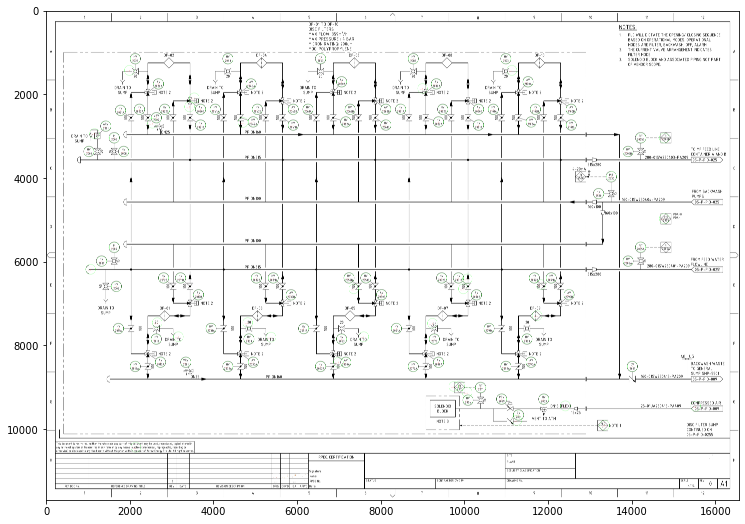

In [5]:
count = 1
img_circles = img_orig.copy()
for i in all_circles_rounded[0]:
    cv2.circle(img_circles, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(img_circles, (i[0], i[1]),2, (255, 0, 0), 3)
    cv2.putText(img_circles, 'Circle ' + str(count), (i[0]-70, i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)
    count += 1

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img_circles)
plt.imsave(fname='img_output.jpg', arr=img_circles)

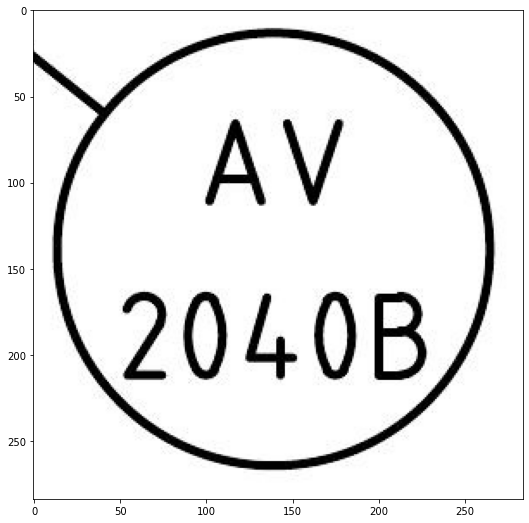

In [6]:
cropped_imgs = []
cropped_imgs_txt = []
img_circle_txt = img_orig.copy()

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\diego.giraldo\AppData\Local\Tesseract-OCR\Tesseract.exe'

for i in all_circles_rounded[0]:
    radius = np.uint16(i[2]*1.2)
    cropped_img = img_circle_txt[i[1]-radius:i[1]+radius,i[0]-radius:i[0]+radius]
    cropped_imgs.append(cropped_img)
    

    cropped_imgs_txt.append(pytesseract.image_to_string(cropped_img))

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cropped_imgs[0])
img_tess = cv2.cvtColor(cropped_imgs[0], cv2.COLOR_BGR2RGB)


In [7]:
# print(pytesseract.image_to_string(cv2.imread('text_test.jpg')))
# img_box_txt = '.\images_tests\pid_box_test.png'
# print(pytesseract.image_to_string(cv2.imread(img_box_txt)))